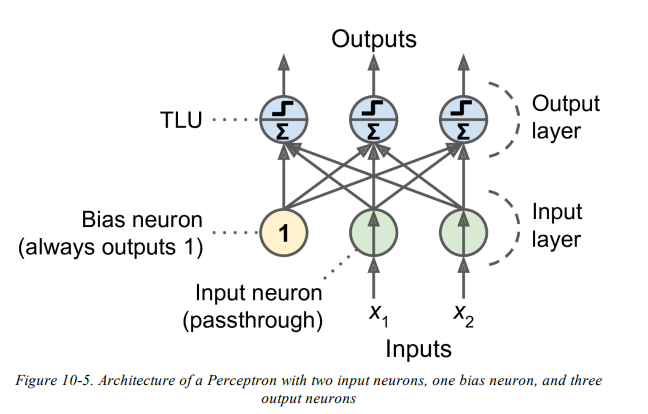

In [112]:
import numpy as np


class Perceptron:

  def __init__(self,lr=1e-4,epochs=100):
    self.is_fitted=False
    self.lr=lr
    self.epochs=epochs
    self.weights=None
    self.step_function=self.sign
    self.bias=1
  
  def fit(self,X,y):
    
    n_samples,n_features=X.shape

    X=np.c_[np.ones((n_samples, 1)), X]

    self.weights=np.random.randn(n_features+1) 

    for i in range(self.epochs):
      print(f"Epoch nr {i}")
      for idx, y_target in enumerate(y):
        y_pred=self.step(X[idx])
         
        self.weights= self.weights + self.lr* (y_target- y_pred) *X[idx] # change == 0 if predicted correctly, else weights pushed forward proper target
        
  def step(self,X):
    return self.step_function(X.dot(self.weights  ))

  def predict(self,X):
    X=np.c_[np.ones((X.shape[0], 1)), X]
    return np.where( self.step(X) >= 0 ,1,0 )


  @staticmethod
  def sign(X):
    return np.sign(X)

  @staticmethod
  def heaviside(X):
    return np.heaviside(X)

  


In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
import numpy as np


iris=datasets.load_iris()

X=iris['data'][:,2:]
y=(iris['target']==2).astype(np.int)
y=y.reshape((-1,1))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)


In [126]:
perceptron=Perceptron(lr=1e-6)

In [ ]:
perceptron.fit(X_train,y_train)

In [128]:
perceptron.weights

array([-1.65123844,  0.14400939, -0.23567963])

In [129]:
y_predicted=perceptron.predict(X_val)

In [130]:
accuracy_score(y_val,y_predicted)

0.7666666666666667